In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [4]:
# Normalize image data to [0, 255] for visualization
def normalize_image(image):
    image = np.clip(image, 0, None)  # Ensure no negative values
    image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Normalize to [0, 1]
    image = (image * 255).astype(np.uint8)  # Scale to [0, 255] for display
    return image

# Apply Fourier Transform
def apply_fourier_transform(image):
    ft = np.fft.fft2(image)  # Compute the 2D Fourier Transform
    ft_shift = np.fft.fftshift(ft)  # Shift the zero frequency to the center
    magnitude_spectrum = np.log(1 + np.abs(ft_shift))  # Compute magnitude spectrum
    return ft, ft_shift, magnitude_spectrum

def apply_inverse_fourier_transform(ft_shifted):
    ft_ishift = np.fft.ifftshift(ft_shifted)  # Reverse the shift
    img_reconstructed = np.fft.ifft2(ft_ishift)  # Apply Inverse 2D Fourier Transform
    img_reconstructed = np.abs(img_reconstructed)  # Take the magnitude (real values)
    return normalize_image(img_reconstructed)  # Normalize for display

In [5]:
def visualize_results(original, magnitude_spectrum, reconstructed):
    original = normalize_image(original)  # Normalize the original image
    magnitude_spectrum = normalize_image(magnitude_spectrum)  # Normalize the spectrum
    
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap="gray")
    plt.axis("off")

    # Magnitude Spectrum
    plt.subplot(1, 3, 2)
    plt.title("Magnitude Spectrum")
    plt.imshow(magnitude_spectrum, cmap="gray")
    plt.axis("off")

    # Reconstructed Image
    plt.subplot(1, 3, 3)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

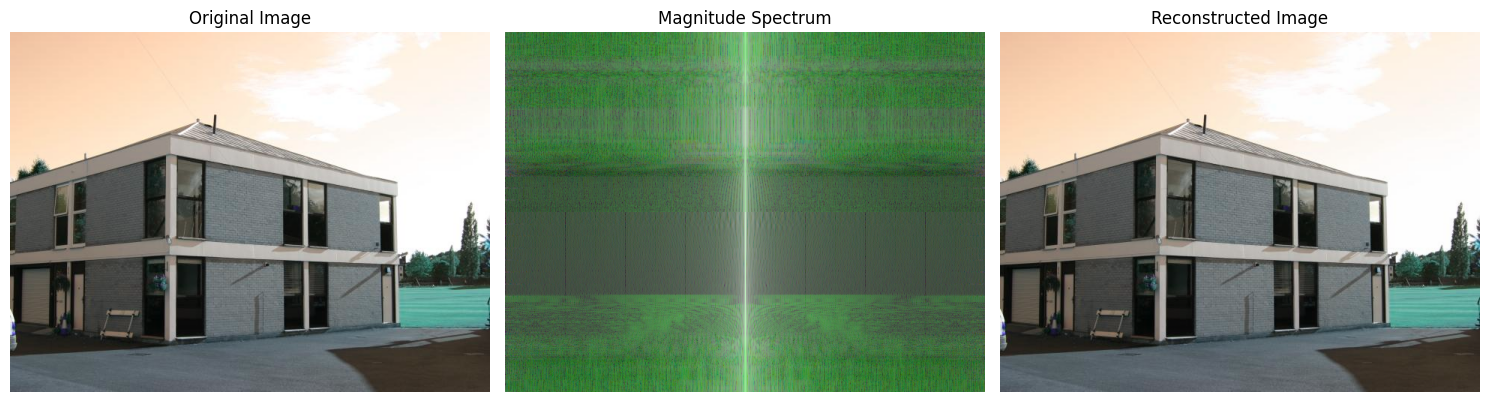

In [11]:
image_path = 'msrcorid/buildings/183_8326.JPG'
# image_path = 'msrcorid/kitchen_utensils/forks/155_5559.JPG'
# image_path = 'msrcorid/kitchen_utensils/knives/156_5664.JPG'
# Replace with your image path
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Fourier Transform and Magnitude Spectrum
ft, ft_shift, magnitude_spectrum = apply_fourier_transform(image)

# Fourier Transform
ft = np.fft.fft2(image)
ft_shift = np.fft.fftshift(ft)  # Shift for visualization
magnitude_spectrum = np.log(1 + np.abs(ft_shift))

# Inverse Fourier Transform (use the shifted version)
reconstructed_image = apply_inverse_fourier_transform(ft_shift)

# Visualize the results
visualize_results(image, magnitude_spectrum, reconstructed_image)
